In [22]:
import numpy as np
from skimage import measure
from skimage.segmentation import find_boundaries
from skimage.morphology import opening,closing
from skimage.io import imread
from matplotlib import pyplot as plt
from os import listdir
import pandas as pd
from scipy.stats import kde
import seaborn as sns
import copy
import pickle
import scipy.ndimage as ndimage
import scipy.interpolate.fitpack as fitpack

import contour_class
import utility_tools

import image_warp
from contour_tool import df_find_contour_points,find_contour_points,generate_contours,align_contour_to,align_contours

import hj_util

In [9]:
#main_path='/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/'

img_path = "/net/capricorn/home/xing/huijing/Segmentation/data/Incucyte_data/06-21-21-B1_02_crop_part_30/"
output_path = "/net/capricorn/home/xing/huijing/Segmentation/data/Incucyte_data/06-21-21-B1_02_crop_part_30_output/"

main_path = output_path
# sample_path='/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/output/2/seg/'
# img_list=sorted(listdir(sample_path))
# sample_img_list=[]
# for i in np.arange(0,len(img_list),24):
#     sample_img_list.append(img_list[i])
# print(len(sample_img_list))

In [4]:
#sample_path='/home/zoro/Desktop/experiment_data/2019-03-22_a549_tgf4ng_2d/seg_sample2/'
sample_path = output_path+"seg"
sample_img_list=sorted(listdir(sample_path))
print(sample_img_list)

['seg_VID99_B1_2_00d00h00m.png', 'seg_VID99_B1_2_00d04h05m.png', 'seg_VID99_B1_2_00d08h15m.png', 'seg_VID99_B1_2_00d12h20m.png', 'seg_VID99_B1_2_00d16h30m.png', 'seg_VID99_B1_2_00d20h35m.png', 'seg_VID99_B1_2_01d00h45m.png', 'seg_VID99_B1_2_01d04h55m.png', 'seg_VID99_B1_2_01d09h00m.png', 'seg_VID99_B1_2_01d13h10m.png', 'seg_VID99_B1_2_01d17h15m.png', 'seg_VID99_B1_2_01d21h25m.png', 'seg_VID99_B1_2_02d01h40m.png', 'seg_VID99_B1_2_02d05h45m.png', 'seg_VID99_B1_2_02d09h55m.png', 'seg_VID99_B1_2_02d14h00m.png', 'seg_VID99_B1_2_02d18h10m.png', 'seg_VID99_B1_2_02d22h20m.png', 'seg_VID99_B1_2_03d02h30m.png', 'seg_VID99_B1_2_03d06h40m.png', 'seg_VID99_B1_2_03d10h45m.png', 'seg_VID99_B1_2_03d14h55m.png', 'seg_VID99_B1_2_03d19h00m.png', 'seg_VID99_B1_2_03d23h10m.png', 'seg_VID99_B1_2_04d03h20m.png', 'seg_VID99_B1_2_04d07h25m.png', 'seg_VID99_B1_2_04d11h35m.png', 'seg_VID99_B1_2_04d15h40m.png', 'seg_VID99_B1_2_04d19h50m.png']


# 每三张图画一张contour

In [43]:
def list_sub_group(list_len, num):
    
    inxs = []
    i = 0
    while i<list_len:
        sub_inx = []
        j = 0
        while j<num:
            sub_inx.append(i)
            j = j+1
            i = i+1
            
        inxs.append(sub_inx)
        
        
    return inxs

inx_list = list_sub_group(len(sample_img_list), 3)
inx_list

[[0, 1, 2],
 [3, 4, 5],
 [6, 7, 8],
 [9, 10, 11],
 [12, 13, 14],
 [15, 16, 17],
 [18, 19, 20],
 [21, 22, 23],
 [24, 25, 26],
 [27, 28, 29]]

In [46]:
def mean_contours_by_subgroup(sample_path,sample_img_list, 
                              inx_list, contour_value=0.5):
    
    contours = []
    i = 0
    while i<len(inx_list):
        sample_img_list_sub = hj_util.list_select_by_index(sample_img_list, inx_list[i])
        contour_points_and_obj=find_contour_points(sample_path,sample_img_list_sub,contour_value=0.5)
        #print(len(contour_points_and_obj))
        cell_contours,sort_obj_arr=generate_contours(contour_points_and_obj,closed_only = True, min_area = None, max_area = None, axis_align = True)
        
        for j in range(len(cell_contours)):
            cell_contours[j].resample(num_points=150)
            cell_contours[j].axis_align()
            #points=cell_contours[j].points
            #plt.plot(points[:, 0], points[:, 1], '.')
            
        mean_contour,iters=align_contours(cell_contours,allow_reflection = True,allow_scaling = False,max_iters = 20)
        contours.append(mean_contour)
        
        plt.figure()
        plt.plot(mean_contour.points[:, 0], mean_contour.points[:, 1], '.')
        plt.xlim((-80, 80))
        plt.ylim((-50, 50))
        plt.savefig("mean_contour_"+str(i).zfill(2)+".png", dpi= 300)
        plt.close()
        
        print(i)
        i = i+1
    return contours

In [47]:
contours_t = mean_contours_by_subgroup(sample_path,sample_img_list, inx_list, contour_value=0.5)

0
1
2
3
4
5
6
7
8


IndexError: list index out of range

In [5]:
contour_points_and_obj=find_contour_points(sample_path,sample_img_list,contour_value=0.5)

In [6]:
cell_contours,sort_obj_arr=generate_contours(contour_points_and_obj,closed_only = True, min_area = None, max_area = None, axis_align = True)

In [20]:
len(cell_contours), len(sample_img_list)

(503, 29)

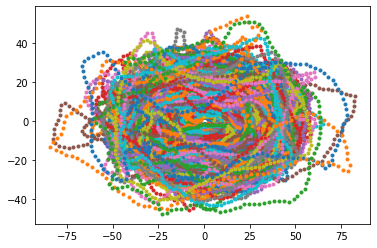

In [7]:
for i in range(len(cell_contours)):
    cell_contours[i].resample(num_points=150)
    cell_contours[i].axis_align()
    points=cell_contours[i].points
    plt.plot(points[:, 0], points[:, 1], '.')
plt.show()

In [8]:
# be careful about the allow_scaling
mean_contour,iters=align_contours(cell_contours,allow_reflection = True,allow_scaling = False,max_iters = 20)

In [10]:
print(iters)
with open(main_path+'dld1_ctrl_mean_cell_contour', 'wb') as fp:
    pickle.dump(mean_contour, fp)

20


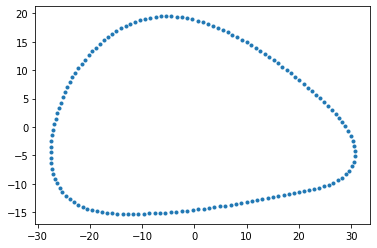

In [49]:
# with open(main_path+'/A549_ctrl_mean_cell_contour', 'rb') as fp:
#     mean_contour=pickle.load(fp)
# with open(main_path+'/A549_emt_mean_cell_contour', 'rb') as fp:
#     emt_mean_contour=pickle.load(fp)
plt.plot(mean_contour.points[:, 0], mean_contour.points[:, 1], '.')
# plt.plot(emt_mean_contour.points[:, 0], emt_mean_contour.points[:, 1], '.')
# plt.legend(('control','TGF-beta'))
plt.savefig("cell_contours_mean_all.pdf")
plt.show()

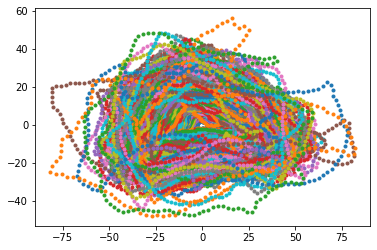

In [12]:
for i in range(len(cell_contours)):
    points=cell_contours[i].points
    plt.plot(points[:, 0], points[:, 1], '.')
plt.show()

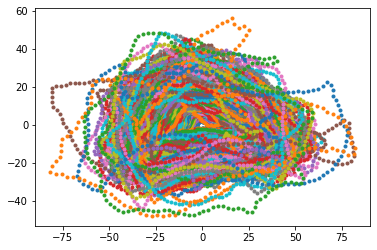

In [48]:
for i in range(len(cell_contours)):
    scale_back=utility_tools.decompose_homogenous_transform(cell_contours[i].to_world_transform)[1] 
    cell_contours[i].scale(scale_back)
    points=cell_contours[i].points
    plt.plot(points[:, 0], points[:, 1], '.')
plt.savefig("cell_contours_all.pdf")
plt.show()

In [14]:
pca_contours=contour_class.PCAContour.from_contours(contours=cell_contours,required_variance_explained = 0.98,return_positions=False)

In [15]:
with open(main_path+'dld1_pca_contours', 'wb') as fp:
    pickle.dump(pca_contours, fp)
# with open (sample_path+'/pca_contours', 'rb') as fp:
#     pca_contours = pickle.load(fp)

In [50]:
with open ("/net/capricorn/home/xing/huijing/Segmentation/data/Incucyte_data/norm_haralick_pca", 'rb') as fp:
    pca_haralick = pickle.load(fp)

In [52]:
dot_color=np.arange(Y[:].shape[0])
cm=plt.cm.get_cmap('jet')

sc=plt.scatter(Y[:,0],Y[:,1],c=dot_color,cmap=cm)
plt.scatter(Y[:,0],Y[:,1],s=0.1)
plt.axis([-100000,500000,-2000,2000])
plt.show()
sns.kdeplot(Y[:,0],Y[:,1],n_levels=100,shade=True)
plt.axis([-100000,500000,-2000,2000])
plt.show()

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_params',
 'get_precision',
 'inverse_transform',
 'iterated_power',
 'mean_',
 'n_components',
 'n_components_',
 'n_features_',
 'n_features_in_',
 'n_samples_',
 'noise_variance_',
 'random_state',
 'score',
 'scor

[0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0.]
[2. 0. 0. 0. 0. 0. 0. 0.]
[-1.  0.  0.  0.  0.  0.  0.  0.]
[-2.  0.  0.  0.  0.  0.  0.  0.]
points = shape_array0
points = shape_array1
points = shape_array3


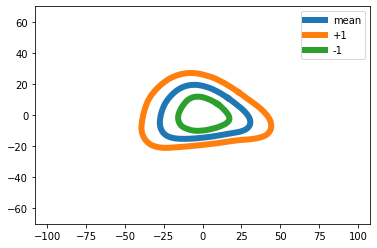

[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0.]
[0. 2. 0. 0. 0. 0. 0. 0.]
[ 0. -1.  0.  0.  0.  0.  0.  0.]
[ 0. -2.  0.  0.  0.  0.  0.  0.]
points = shape_array0
points = shape_array1
points = shape_array3


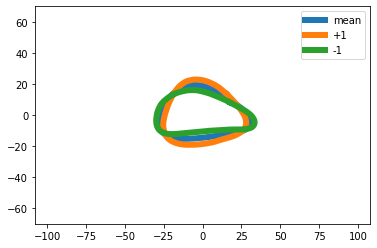

[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 2. 0. 0. 0. 0. 0.]
[ 0.  0. -1.  0.  0.  0.  0.  0.]
[ 0.  0. -2.  0.  0.  0.  0.  0.]
points = shape_array0
points = shape_array1
points = shape_array3


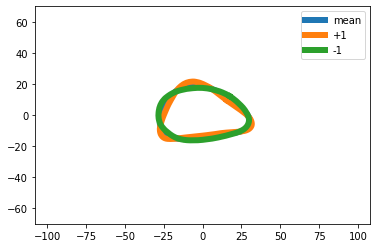

[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 2. 0. 0. 0. 0.]
[ 0.  0.  0. -1.  0.  0.  0.  0.]
[ 0.  0.  0. -2.  0.  0.  0.  0.]
points = shape_array0
points = shape_array1
points = shape_array3


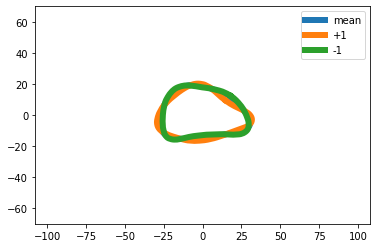

[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 2. 0. 0. 0.]
[ 0.  0.  0.  0. -1.  0.  0.  0.]
[ 0.  0.  0.  0. -2.  0.  0.  0.]
points = shape_array0
points = shape_array1
points = shape_array3


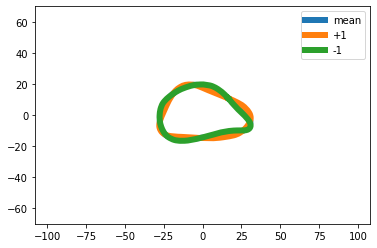

[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 2. 0. 0.]
[ 0.  0.  0.  0.  0. -1.  0.  0.]
[ 0.  0.  0.  0.  0. -2.  0.  0.]
points = shape_array0
points = shape_array1
points = shape_array3


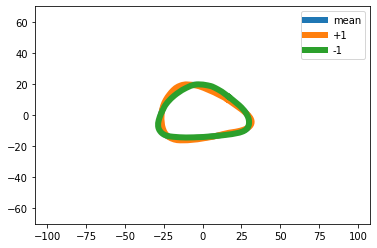

[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 2. 0.]
[ 0.  0.  0.  0.  0.  0. -1.  0.]
[ 0.  0.  0.  0.  0.  0. -2.  0.]
points = shape_array0
points = shape_array1
points = shape_array3


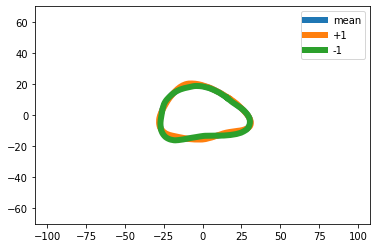

[0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 2.]
[ 0.  0.  0.  0.  0.  0.  0. -1.]
[ 0.  0.  0.  0.  0.  0.  0. -2.]
points = shape_array0
points = shape_array1
points = shape_array3


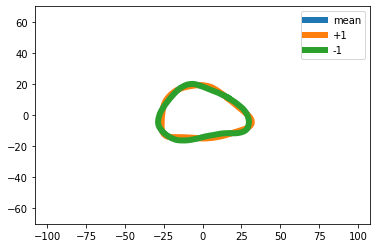

In [16]:
#-------plot principal modes-------------------------
for pci in range(pca_contours.position.shape[0]):
    cell_posi=pca_contours.position
    mode_std1=copy.copy(cell_posi)
    mode_std1[pci]=1
    mode_std2=copy.copy(cell_posi)
    mode_std2[pci]=2
    mode_std_1=copy.copy(cell_posi)
    mode_std_1[pci]=-1
    mode_std_2=copy.copy(cell_posi)
    mode_std_2[pci]=-2



    print(cell_posi)
    print(mode_std1)
    print(mode_std2)
    print(mode_std_1)
    print(mode_std_2)
    shape_array0=contour_class.PCAContour.points_at_position(pca_contours,cell_posi)
    shape_array1=contour_class.PCAContour.points_at_position(pca_contours,mode_std1)
    shape_array2=contour_class.PCAContour.points_at_position(pca_contours,mode_std2)
    shape_array3=contour_class.PCAContour.points_at_position(pca_contours,mode_std_1)
    shape_array4=contour_class.PCAContour.points_at_position(pca_contours,mode_std_2)

    for i in [0,1,3]:
        com_str='points = shape_array'+str(i)
        print(com_str)
        exec(com_str)
    #     print(points.shape)
        #fig, ax = plt.subplots(figsize=(12, 12))

        plt.plot(points[:, 0], points[:, 1], '-',linewidth=6)
        plt.legend(('mean','+1','-1'))

        plt.axis('equal')
        plt.axis([-120,120,-70,70])
    plt.show()


In [14]:
# cell_posi=np.array([ -1.,  -1. , 0.,  0. , 0. , 0. , 0.])
# points=contour_class.PCAContour.points_at_position(pca_contours,cell_posi)
# plt.plot(points[:, 0], points[:, 1], '-',linewidth=6)


# plt.axis('equal')
# plt.axis([-120,120,-70,70])
# plt.show()

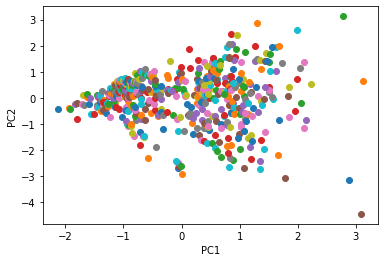

In [17]:
all_cord=[]
for i in range(len(cell_contours)):
    cell_posi=contour_class.PCAContour.find_position(pca_contours,cell_contours[i])
    all_cord.append(cell_posi)
    plt.scatter(cell_posi[0],cell_posi[1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

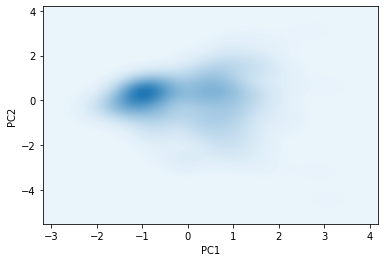

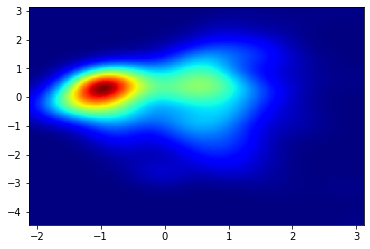

In [18]:
all_cord=np.array(all_cord)

x,y=all_cord[:,0],all_cord[:,1]
sns.kdeplot(x,y,n_levels=200,shade=True)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
# Make the plot
plt.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap=plt.cm.jet)
plt.show()